# Customer Segmentation

## Importing Necessary Libraries

In [557]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",100)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

## Loading the Dataset

In [558]:
df = pd.read_csv("recommendationdata.csv", low_memory = False)

## EDA

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [560]:
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
2696,2283,Rene,Haley,NaN,1453605580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1456953521,1.0,11805,2283,Rene,Haley,NaN,11805,NaN,NaN,NaN,USD,NaN,37.13,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.08,NaN,fedex,11|Ground,NaN,NaN,NaN,5.0355E+14,3.0,1.453739e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Contour-Bedpans-Graphite,NaN,CS,8 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,E0275,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.50,15.00,15.00,NaN,NaN,NaN,NaN,NaN,NaN,Plastic,NaN,NaN,NaN,PF06114,0.0,NaN
923,769,J.A.,Dingman,Company57,1425274376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764376,0.0,3657,769,J.A.,Dingman,Company57,3657,NaN,NaN,NaN,USD,NaN,58.06,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.01,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,"1ZF11Y490394180613, 314232088083709",3.0,1.425275e+09,NaN,authorize.net,NaN,...,NaN,shower grab bar; bath grab bar; tub grab bar; ...,NaN,NaN,Adjustable-Angle-Rotating-Suction-Cup-Grab-Bar,NaN,EA,NaN,NaN,NaN,19.75,4.0,5.0,No,Not Made With Natura,8.223830e+11,NaN,NaN,http://www.drivemedical.com/product-manuals/rt...,NaN,E0241,NaN,NaN,NaN,NaN,0.0,NaN,NaN,Limited Lifetime,0.0,NaN,Universal,No Assembly Required,Tool Free Installation,22.50,6.25,3.88,1.40,Ships Same Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BS35,0.0,NaN
1079,888,Donald,Wright,NaN,1427831880,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1437764256,0.0,3946,888,Donald,Wright,NaN,3946,NaN,NaN,NaN,USD,NaN,29.26,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.21,NaN,fedex,11|Ground,NaN,NaN,NaN,2.27195E+13,3.0,1.427832e+09,abe,authorize.net,NaN,...,NaN,NaN,NaN,NaN,4-Panel-Abdominal-BindersLargeX-Large,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,8.019642e+10,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,1.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.30,4.00,2.40,NaN,NaN,NaN,NaN,NaN,Large/Extra Large,NaN,NaN,NaN,NaN,PF03291,0.0,NaN
1801,1503,janet,zeanah,NaN,1440899433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1456954338,0.0,5835,1503,janet,zeanah,NaN,5835,NaN,NaN,NaN,USD,NaN,116.84,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116.84,NaN,manual

In [561]:
#Returns missing value percentages
df.isnull().sum()/(len(df))*100

Customers.id               0.000000
Customers.fname            0.000000
Customers.lname            0.000000
Customers.company         82.665713
Customers.create_date      0.000000
                            ...    
Products.leg_style       100.000000
Products.seat_size        96.137339
Products.family_id         7.749165
Products.saved_status      6.294707
Products.freight_cost    100.000000
Length: 181, dtype: float64

In [563]:
# If there is a duplicate row, we delete it
df.drop_duplicates(inplace = True)

In [564]:
# Eliminating losses over 30
perc = 30.0
min_count = int(((100-perc)/100)*df.shape[0]+1)
df.dropna(axis = 1, thresh = min_count, inplace = True)

In [565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 0 to 4193
Data columns (total 72 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.id                   4194 non-null   int64  
 1   Customers.fname                4194 non-null   object 
 2   Customers.lname                4194 non-null   object 
 3   Customers.create_date          4194 non-null   int64  
 4   Customers.last_modified        4194 non-null   int64  
 5   Customers.customer_type        3771 non-null   float64
 6   Orders.id                      4194 non-null   int64  
 7   Orders.customer_id             4194 non-null   int64  
 8   Orders.fname                   4194 non-null   object 
 9   Orders.lname                   4194 non-null   object 
 10  Orders.order_number            4194 non-null   object 
 11  Orders.currency                4194 non-null   object 
 12  Orders.subtotal                4194 non-null   f

In [566]:
df.isnull().sum()

Customers.id                  0
Customers.fname               0
Customers.lname               0
Customers.create_date         0
Customers.last_modified       0
                           ... 
Products.shipping_length    196
Products.shipping_width     196
Products.shipping_height    196
Products.family_id          325
Products.saved_status       264
Length: 72, dtype: int64

In [567]:
df.describe()

,Customers.id,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.cost,Products.flags,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.qb_edit_sequence,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status
count,4194.000000,4.194000e+03,4.194000e+03,3771.000000,4194.000000,4194.000000,4194.000000,3737.000000,3999.000000,4194.000000,4189.000000,4.176000e+03,4176.000000,4194.000000,4.194000e+03,4.171000e+03,3.848000e+03,4011.000000,4194.000000,4194.000000,4151.000000,4194.000000,4194.000000,4191.000000,4037.000000,4037.000000,4037.000000,4037.000000,4017.000000,4036.000000,4037.000000,2987.000000,4.037000e+03,2959.000000,3.130000e+03,3917.000000,3.728000e+03,3998.000000,3998.000000,3998.000000,3930.000000
mean,1796.518121,1.440971e+09,1.450401e+09,0.137364,9142.984025,1796.518121,131.925196,0.800838,7.141263,137.192818,2.958940,1.443104e+09,134.842263,1.326180,1.443054e+09,1.449607e+09,1.442167e+09,0.124159,11156.068670,9142.984025,4451.426162,1.858846,67.349132,51.112718,4518.398068,0.987119,1.629676,3.400297,121.683321,74.266043,52.318192,9549.464680,1.462428e+09,0.940858,2.865179e+13,61.543528,1.450329e+09,17.208216,10.872750,11.592447,0.876336
std,1065.679090,1.887681e+07,1.021334e+07,0.391842,5276.541078,1065.679090,231.156869,4.859280,4.531500,222.898475,0.312482,1.809258e+07,213.804804,1.508683,1.814291e+07,9.118822e+06,1.793374e+07,0.375087,5802.466202,5276.541078,5577.392427,8.821959,95.571793,74.155515,5614.454744,1.386196,1.420626,2.248065,245.856090,98.829781,74.691642,16246.897822,1.586206e+06,0.235929,1.794757e+13,5.086931,4.029036e+05,10.508782,6.781847,10.250909,1.364374
min,3.000000,1.386089e+09,1.437559e+09,0.000000,23.000000,3.000000,2.890000,0.000000,0.000000,2.890000,0.000000,1.386090e+09,2.890000,0.000000,1.386090e+09,1.438868e+09,1.386103e+09,0.000000,31.000000,23.000000,1.000000,1.000000,1.120000,0.280000,1.000000,0.000000,1.000000,1.000000,1.020000,1.540000,0.280000,0.000000,1.452269e+09,0.000000,1.542161e+10,0.000000,1.442503e+09,0.000000,0.000000,0.000000,0.000000
25%,865.250000,1.427323e+09,1.437763e+09,0.000000,4258.000000,865.250000,36.750000,0.000000,0.000000,44.110000,3.000000,1.431858e+09,44.015000,1.000000,1.431802e+09,1.440529e+09,1.430999e+09,0.000000,5847.250000,4258.000000,1009.000000,1.000000,24.030000,16.200000,1012.000000,0.000000,1.000000,3.000000,33.110000,24.400000,15.500000,0.000000,1.462370e+09,1.000000,1.008020e+13,62.000000,1.450323e+09,9.000000,5.700000,4.000000,0.000000
50%,1747.500000,1.446412e+09,1.456954e+09,0.000000,9641.000000,1747.500000,74.740000,0.000000,9.950000,80.510000,3.000000,1.449678e+09,79.990000,1.000000,1.449675e+09,1.450214e+09,1.448039e+09,0.000000,11770.000000,9641.000000,1867.000000,1.000000,43.460000,32.500000,1867.000000,0.000000,1.000000,3.000000,72.330000,48.245000,31.750000,0.000000,1.463163e+09,1.000000,4.008020e+13,62.000000,1.450324e+09,15.500000,10.000000,8.645000,0.000000
75%,2698.750000,1.456955e+09,1.456956e+09,0.000000,14011.750000,2698.750000,139.960000,0.000000,9.950000,143.855000,3.000000,1.457913e+09,142.810000,1.000000,1.457727e+09,1.457976e+09,1.456894e+09,0.000000,16482.750000,14011.750000,4345.500000,1.000000,74.990000,59.500000,4371.000000,3.000000,2.000000,3.000000,134.390000,83.360000,59.990000,32896.000000,1.463163e+09,1.000000,4.088440e+13,62.000000,1.450337e+09,23.500000,15.000000,15.000000,3.000000
max,3736.000000,1.463418e+09,1.463418e+09,2.000000,17437.000000,3736.000000,516

In [568]:
df.sample(15)

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.flags,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.short_description,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.multiple,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
3742,3296,Steven,Kiselyk,1461186878,1461186878,NaN,15892,3296,Steven,Kiselyk,15892,USD,24.40,0.00,9.95,34.35,fedex,11|Ground,4.8383E+14,3.0,1.461187e+09,NaN,34.35,NaN,NaN,1,1461186878,1.461275e+09,1.461271e+09,NaN,18512,15892,1411.0,"Protection Plus Disposable Underpads, Blue, 24...",1,24.40,16.83,1411.0,0.0,sub-product-detail.html,1.0,3.0,"Protection Plus Disposable Underpads,Blue,24"" ...","Protection Plus Disposable Underpads, Blue, 24...",34.16,24.40,16.83,32896.0,1.462370e+09,1.0,4.008020e+13,MEDLINE,MSC281224C,62.0,health-care-products,generic/online%3Aen%3AUS%3A1411,"Incontinence, Urology & Ostomy > incontinence ...",Health & Beauty > Health Care,80002303-1434307563,1.450323e+09,"UNDERPAD,ECON,DISP,17""X24"",25/BG",<ul><li> Protection Plus&reg; disposable unde...,"Protection Plus Disposable Underpads, Blue | M...",Protection-Plus-Disposable-Underpads-2,CS,1 CS,NOT COVERED BY MEDICARE - CHECK REIMBURSEMENT ...,12.000,19.000,8.750,PF01461,0.0
751,599,Mary,Said,1421167221,1437763490,0.0,3112,599,Mary,Said,3112,USD,24.40,2.08,9.95,36.35,NaN,11|Ground,6.87398E+14,3.0,1.421167e+09,NaN,35.89,NaN,NaN,1,1421167221,1.438868e+09,1.421173e+09,0.0,4590,3112,1411.0,"Protection Plus Disposable Underpads, Blue",1,24.40,16.83,1411.0,0.0,sub-product-detail.html,1.0,3.0,"Protection Plus Disposable Underpads,Blue,24"" ...","Protection Plus Disposable Underpads, Blue, 24...",34.16,24.40,16.83,32896.0,1.462370e+09,1.0,4.008020e+13,MEDLINE,MSC281224C,62.0,health-care-products,generic/online%3Aen%3AUS%3A1411,"Incontinence, Urology & Ostomy > incontinence ...",Health & Beauty > Health Care,80002303-1434307563,1.450323e+09,"UNDERPAD,ECON,DISP,17""X24"",25/BG",<ul><li> Protection Plus&reg; disposable unde...,"Protection Plus Disposable Underpads, Blue | M...",Protection-Plus-Disposable-Underpads-2,CS,1 CS,NOT COVERED BY MEDICARE - CHECK REIMBURSEMENT ...,12.000,19.000,8.750,PF01461,0.0
1264,1043,Lee,Ceccotti,1431801710,1437559425,0.0,5825,1043,Lee,Ceccotti,5825,USD,366.82,0.00,0.00,366.82,fedex,11|Ground,1.02633E+14,3.0,1.440877e+09,authorize.net,366.82,7479752130,09095C,1,1440877380,1.441994e+09,1.441841e+09,0.0,7565,5825,1574.0,FitRight Active Male Guards,1,65.00,50.00,1574.0,0.0,sub-product-detail.html,1.0,3.0,"FitRight Active Male Guards,6"" X 11""","FitRight Active Male Guards, 6"" X 11""",91.70,65.50,50.00,32896.0,1.462370e+09,1.0,4.088440e+13,MEDLINE,MSCMG02,62.0,health-care-products,online:en:US:1574,"Incontinence, Urology & Ostomy > incontinence ...",Health & Beauty > Health Care,800012C4-1434302548,1.450324e+09,"LINER,INCONTINENT,MALE GUARD, 6X11",<ul><li> These

In [569]:
df.sample(5)

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.flags,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.short_description,Products.long_description,Products.seo_title,Products.seo_url,Products.unit,Products.multiple,Products.hcpcs,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
461,403,Jana,Mane,1414590002,1437559989,0.0,5802,403,Jana,Mane,5802,USD,277.50,0.00,0.00,331.90,fedex,11|Ground,6.49865E+13,3.0,1.440774e+09,Credit Card,331.90,NaN,NaN,1,1440774253,1.441251e+09,1.440808e+09,0.0,7540,5802,2107.0,Medline MoliCare Super Plus Disposable Adult D...,5,55.50,44.94,2107.0,0.0,sub-product-detail.html,1.0,3.0,"MoliCare Disposable Super Plus Briefs,27""-47""",Medline MoliCare Super Plus Disposable Adult D...,82.42,58.87,44.94,32896.0,1.463163e+09,1.0,4.049500e+12,HARTMANN-CONCO INC,PHT169670,62.0,health-care-products,generic/online%3Aen%3AUS%3A2107,"Incontinence, Urology & Ostomy > incontinence ...",Health & Beauty > Health Care,80001C24-1434305386,1.450324e+09,"BRIEF,MOLICARE,SUPER,MD,27-47"",DISP",<ul><li> MoliCare Disposable Super Plus Brief...,MoliCare Super Plus Disposable Adult Diapers -...,MoliCare-Disposable-Super-Plus-BriefsMediumLarge,CS,1 CS,NOT COVERED BY MEDICARE - CHECK REIMBURSEMENT ...,15.500,15.3,20.75,PF01409,0.0
4048,3593,Dawn-Marie,Bey,1462796707,1462796707,0.0,16980,3593,Dawn-Marie,Bey,16980,USD,411.60,0.00,9.95,380.39,fedex,11|Ground,5.0355E+14,3.0,1.462823e+09,paypal,380.39,06A425768W5319913,NaN,1,1462822877,1.462904e+09,1.462900e+09,0.0,19695,16980,4557.0,Maxi Sanitary Pads with Adhesive,12,34.30,24.50,4557.0,0.0,sub-product-detail.html,1.0,3.0,Maxi Sanitary Pads with Adhesive,Maxi Sanitary Pads with Adhesive,48.02,34.30,24.50,32896.0,1.463163e+09,NaN,4.008020e+13,MEDLINE,NON241286,62.0,health-care-products,generic/online%3Aen%3AUS%3A4557,Personal Care > Feminine Hygiene > Sanitary Pa...,Health & Beauty > Health Care,80008237-1438894613,1.450325e+09,"PAD,SANITARY,11 IN,MAXI,N-STRL,IND WRAP",<ul><li> Maximum absorbency for increased conf...,Maxi Sanitary Pads with Adhesive | MEDLINE - N...,Maxi-Sanitary-Pads-with-Adhesive-5,CS,1 CS,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,21.801,13.5,12.50,PF06262,0.0
1084,893,Robert,Purnick,1427920879,1437763424,0.0,3965,893,Robert,Purnick,3965,USD,114.99,8.05,9.95,133.05,NaN,11|Ground,6.87398E+14,3.0,1.427921e+09,authorize.net,132.99,7056438385,00186R,1,1427921029,1.438868e+09,1.427998e+09,0.0,5518,3965,845.0,"Medline K1 Basic Standered Wheelchair, 18 Inch",1,114.99,90.99,845.0,3.0,sub-product-detail.html,1.0,3.0,K1 Basic Wheelchairs,"Medline Excel K1 Basic Wheelchair, Desk Length...",202.13,144.38,105.00,0.0,1.463163e+09,1.0,NaN,MEDLINE,MDS806250EE,62.0,health-care-products,generic/online%3Aen%3AUS%3A845,Wheelchairs > Manual Wheelchairs > Standard Wh...,Health & Beauty > Health Care,8000167A-1434303677,1.450323e+09,"WHEELCHAIR,K1 BASIC,18"",DLA,S/A FOOT",<ul><li

In [570]:
# we delete unnecessary columns
df.drop(["Customers.id", "Customers.fname", "Customers.lname", "Customers.create_date", "Customers.last_modified", "Customers.id", "Orders.id", "Orders.customer_id", "Orders.fname", "Orders.lname", "Orders.order_number", "Orders.payment_date", "Orders.tracking", "Orders.payment_id", "Orders.payment_code", "Orders.placed_date", "Orders.updated_date", "Orders.shipped_date", "Order_Items.id","Order_Items.parent", "Order_Items.cost", "Products.name", "Products.display_name", "Products.list_price", "Products.price", "Products.cost", "Products.last_modified", "Products.taxable", "Products.amazon_item_type", "Products.quickbooks_id", "Products.qb_edit_sequence", "Products.seo_title", "Products.seo_url", "Products.multiple","Products.hcpcs", "Orders.currency", "Order_Items.product_name", "Products.template", "Products.shopping_mpn","Products.google_shopping_id", "Products.short_description", "Products.family_id"], axis=1, inplace=True)

In [571]:
df["Products.saved_status"].value_counts()

0.0    2782
3.0    1148
Name: Products.saved_status, dtype: int64

In [572]:
df

,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,Orders.customer_type,Order_Items.product_id,Order_Items.qty,Order_Items.price,Products.id,Products.status,Products.vendor,Products.import_id,Products.flags,Products.shopping_gtin,Products.shopping_brand,Products.shopping_flags,Products.google_shopping_type,Products.google_shopping_cat,Products.long_description,Products.unit,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status
0,0.0,57.20,0.00,9.95,64.29,fedex,11|Ground,3.0,authorize.net,64.29,1,0.0,2310.0,1,57.20,2310.0,0.0,1.0,3.0,0.0,1.088440e+13,MEDLINE,62.0,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,"<ul><li> Classically designed, value priced</...",EA,24.80,7.50,30.40,0.0
1,0.0,20.00,NaN,9.99,29.99,fedex,11|Ground,3.0,authorize.net,29.99,1,0.0,177.0,4,5.00,177.0,1.0,1.0,3.0,65.0,1.008020e+13,MEDLINE,62.0,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,<ul><li> Only Medline drain bags have a slide...,EA,8.00,7.00,1.50,NaN
2,0.0,68.78,0.00,9.95,78.73,manual,0|Standard Shipping,3.0,authorize.net,78.73,3,0.0,1.0,1,68.78,1.0,0.0,1.0,3.0,32896.0,4.008020e+13,MEDLINE,62.0,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,<ul><li> SensiCare&reg; nitrile exam gloves fe...,CS,13.23,10.04,10.24,0.0
3,0.0,19.56,0.00,9.95,29.55,NaN,11|Ground,3.0,NaN,29.55,1,0.0,983.0,1,19.56,983.0,0.0,1.0,3.0,0.0,NaN,MEDLINE,62.0,"Walking Aids > Rollators, & Walkers > Walkers ...",Health & Beauty > Health Care,<ul><li> This wire basket attaches to almost a...,EA,10.60,7.80,18.50,NaN
4,0.0,36.05,NaN,9.95,46.00,fedex,11|Ground,3.0,NaN,46.00,1,0.0,991.0,1,36.05,991.0,1.0,1.0,3.0,0.0,NaN,ROSCOE MEDICAL INC,62.0,Physical Therapy > Electronic Muscle Stimulation,Health & Beauty > Health Care,<ul><li> The TENS 3000<sup>TM</sup> analog uni...,EA,8.50,2.75,12.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,0.0,14.85,1.21,0.00,16.06,NaN,NaN,3.0,paypal,16.06,0,0.0,1842.0,1,14.85,1842.0,3.0,1.0,3.0,32896.0,8.843890e+11,MEDLINE,62.0,Patient Room And Bedding > Bedside Care > Emes...,Health & Beauty > Health Care,<ul><li> Can be used as a sickness bag </li><...,PK,5.00,5.00,7.00,3.0
4190,NaN,39.99,0.00,NaN,39.99,NaN,NaN,1.0,authorize.net,39.99,0,NaN,782.0,1,39.99,782.0,3.0,1.0,3.0,0.0,NaN,MEDLINE,62.0,Patient Room And Bedding > Patient Room > Bed ...,Health & Beauty > Health Care,"<ul><li> Built to last, our Bed Assist Bar pro...",EA,14.60,4.10,18.00,3.0
4191,NaN,1099.00,0.00,NaN,989.10,NaN,NaN,1.0,authorize.net,989.10,5,0.0,2707.0,1,1099.00,2707.0,3.0,2.0,1.0,0.0,NaN,Drive Medical,62.0,Wheelchairs > Power Wheelchairs & Scooters > 3...,Health & Beauty > Health Care > Mobility & Acc...,<p>For an easily transportable scooter that co...,EA,45.00,20.75,20.75,3.0
4192,NaN,129.99,0.00,0.00,129.99,NaN,NaN,3.0,paypal,129.99,0,NaN,993.0,1,129.99,993.0,3.0,1.0,3.0,0.0,1.008020e+13,MEDLINE,62.0,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,<ul><li> Reinforced design to support higher w...,EA,25.25,8.60,23.20,3.0


In [573]:
df["Orders.shipping_carrier"].value_counts()

fedex     2304
manual    1203
ups         57
NSVA         5
WTVA         2
NDSN         1
HWEP         1
INTF         1
RDWY         1
MT03         1
FEDX         1
Name: Orders.shipping_carrier, dtype: int64

In [574]:
df["Orders.shipping_method"].value_counts()

11|Ground                    2474
0|Standard Shipping           902
-1|Free Shipping              267
0|Free Shipping                91
NATIONAL DELIVERY               6
WILSON TRUCKING CORP            2
HOWARD'S EXPRESS, INC.          2
FEDERAL EXPRESS CORP.           1
ROADWAY EXPRESS                 1
LAND AIR OF NEW ENGLAND         1
INTERNATIONAL FEDEX             1
SOUTHWESTERN MOTOR TRNAS        1
MEDTRANS                        1
NATIONAL DELIVERY SYSTEMS       1
Name: Orders.shipping_method, dtype: int64

In [575]:
df["Orders.payment_type"].value_counts()

authorize.net    3454
paypal            318
Credit Card        32
Check               5
Cash                1
Name: Orders.payment_type, dtype: int64

In [576]:
df["Products.id"].value_counts()

1842.0     88
2107.0     71
911.0      67
910.0      67
1867.0     53
           ..
4296.0      1
16788.0     1
16599.0     1
1400.0      1
15575.0     1
Name: Products.id, Length: 1710, dtype: int64

In [577]:
df["Products.shopping_brand"].value_counts()

MEDLINE                         2672
Drive Medical                    535
HARTMANN-CONCO INC               122
CanDo&reg;                       113
Fabrication Enterprises Inc.      85
                                ... 
Dura-Stick&reg;                    1
ABBOTT DIABETES CARE               1
Val-u-Band                         1
Point-Relief&reg;                  1
AdvanTrode&reg;                    1
Name: Products.shopping_brand, Length: 101, dtype: int64

In [578]:
df["Products.google_shopping_type"].value_counts()

Wheelchairs > Manual Wheelchairs > Transport Wheelchairs                             214
Walking Aids > Rollators, & Walkers > Rollators                                      207
Incontinence, Urology & Ostomy > incontinence > Adult Disposable Briefs - Diapers    175
Incontinence, Urology & Ostomy > incontinence > Disposable Underwear - Pull Ups      117
Pharmacy > Medication & Aids > Pill Cutters/Crushers                                 113
                                                                                    ... 
Personal Care > Personal Care > Nail Care                                              1
Apparel > Gloves > Nonsterile PF Latex Exam Gloves > Aloetouch&laquo;                  1
Incontinence, Urology & Ostomy > Urology > Drainage Leg Bags                           1
Physical Therapy > Evaluation > Alignment                                              1
Apparel > Gloves > Nonsterile PF LF Vinyl Exam Gloves > Cedar                          1
Name: Products.google

In [579]:
df["Products.google_shopping_cat"].value_counts()

Health & Beauty > Health Care                                                                                                        3649
Health & Beauty > Health Care > Mobility & Accessibility > Accessibility Equipment > Wheelchairs                                      281
Health & Beauty > Health Care > Mobility & Accessibility > Accessibility Equipment > Wheelchairs > Manual Wheelchairs                  67
Health & Beauty > Health Care > Mobility & Accessibility > Walking Aids > Walkers                                                      12
Health & Beauty > Health Care > Biometric Monitor Accessories > Blood Pressure Monitor Accessories > Blood Pressure Monitor Cuffs       2
Name: Products.google_shopping_cat, dtype: int64

In [580]:
df["Products.long_description"].value_counts()

<ul><li> 12" (30.5 cm) wheels and handbrakes on top  </li><li> Lifetime warranty on frame  </li><li> Powder coated aluminum frame is lightweight and durable </li><li> Back folds down for easy storage and transport  </li><li> Seat belt for safety  </li><li> Comfortable nylon upholstery  </li><li> Full length permanent armrest </li><li> Detachable footrests  </li><li> Larger rear wheels for better performance on uneven outdoor surfaces </li><li> Weighs only 22 lbs (10 kg)</li></ul>                                                                                                                                                                                                                                    134
<ul><li>  MoliCare Disposable Super Plus Briefs offer all of the features as our Super Briefs, plus they have padded panels for added comfort.</li><li>  Use for extended capacity and overnight use.</li><li>  Available in sizes Small (dark purple), 20"- 31" (51 cm-79 cm); Medium/Large

In [581]:
df["Products.unit"].value_counts()

EA      1773
CS      1337
BX       362
CV       165
PK       122
PR        72
BG        65
GR        18
CASE      13
SET       11
BT        11
KT         8
BOX        6
ST         6
DZ         5
PKG        4
RL         3
PAIR       2
TB         1
CN         1
Name: Products.unit, dtype: int64

In [582]:
df["Orders.shipping_carrier"].value_counts()

fedex     2304
manual    1203
ups         57
NSVA         5
WTVA         2
NDSN         1
HWEP         1
INTF         1
RDWY         1
MT03         1
FEDX         1
Name: Orders.shipping_carrier, dtype: int64

In [583]:
df.isnull().sum()

Customers.customer_type           423
Orders.subtotal                     0
Orders.tax                        457
Orders.shipping                   195
Orders.total                        0
Orders.shipping_carrier           617
Orders.shipping_method            443
Orders.payment_status               5
Orders.payment_type               384
Orders.payment_amount              18
Orders.status                       0
Orders.customer_type              183
Order_Items.product_id             43
Order_Items.qty                     0
Order_Items.price                   0
Products.id                       157
Products.status                   157
Products.vendor                   157
Products.import_id                157
Products.flags                   1207
Products.shopping_gtin           1064
Products.shopping_brand           162
Products.shopping_flags           277
Products.google_shopping_type     215
Products.google_shopping_cat      183
Products.long_description         186
Products.uni

In [584]:
# we delete unnecessary columns
del df["Products.flags"]
del df["Products.shopping_gtin"]
del df["Products.long_description"]

In [585]:
df["Products.saved_status"].value_counts()

0.0    2782
3.0    1148
Name: Products.saved_status, dtype: int64

In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 0 to 4193
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.customer_type        3771 non-null   float64
 1   Orders.subtotal                4194 non-null   float64
 2   Orders.tax                     3737 non-null   float64
 3   Orders.shipping                3999 non-null   float64
 4   Orders.total                   4194 non-null   float64
 5   Orders.shipping_carrier        3577 non-null   object 
 6   Orders.shipping_method         3751 non-null   object 
 7   Orders.payment_status          4189 non-null   float64
 8   Orders.payment_type            3810 non-null   object 
 9   Orders.payment_amount          4176 non-null   float64
 10  Orders.status                  4194 non-null   int64  
 11  Orders.customer_type           4011 non-null   float64
 12  Order_Items.product_id         4151 non-null   f

In [587]:
# filling in blank data
df["Customers.customer_type"].fillna(df["Customers.customer_type"].median(), inplace=True)
df["Orders.tax"].fillna(df["Orders.tax"].median(), inplace=True)
df["Orders.shipping"].fillna(df["Orders.shipping"].median(), inplace=True)
df["Orders.shipping_carrier"].fillna("fedex", inplace=True)
df["Orders.shipping_method"].fillna("11|Ground", inplace=True)
df["Orders.payment_status"].fillna(df["Orders.payment_status"].median(), inplace=True)
df["Orders.payment_type"].fillna("authorize.net", inplace=True)
df["Orders.payment_amount"].fillna(df["Orders.payment_amount"].median(), inplace=True)
df["Orders.customer_type"].fillna(df["Orders.customer_type"].median(), inplace=True)
df["Order_Items.product_id"].fillna(df["Order_Items.product_id"].median(), inplace=True)
df["Products.id"].fillna(df["Products.id"].median(), inplace=True)
df["Products.status"].fillna(df["Products.status"].median(), inplace=True)
df["Products.vendor"].fillna(df["Products.vendor"].median(), inplace=True)
df["Products.import_id"].fillna(df["Products.import_id"].median(), inplace=True)
df["Products.shopping_brand"].fillna("MEDLINE", inplace=True)
df["Products.shopping_flags"].fillna(df["Products.shopping_flags"].median(), inplace=True)    
df["Products.google_shopping_type"].fillna("Wheelchairs > Manual Wheelchairs > Transport Wheelchairs", inplace=True)
df["Products.google_shopping_cat"].fillna("Health & Beauty > Health Care",inplace=True)
df["Products.unit"].fillna("EA", inplace=True)
df["Products.shipping_length"].fillna(df["Products.shipping_length"].median(), inplace=True)
df["Products.shipping_width"].fillna(df["Products.shipping_width"].median(), inplace=True)
df["Products.shipping_height"].fillna(df["Products.shipping_height"].median(), inplace=True)
df["Products.saved_status"].fillna(df["Products.saved_status"].median(), inplace=True)

df["Products.volume"] = df["Products.shipping_length"] * df["Products.shipping_width"] * df["Products.shipping_height"]
del df["Products.shipping_length"]
del df["Products.shipping_width"]
del df["Products.shipping_height"]



In [588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4194 entries, 0 to 4193
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customers.customer_type        4194 non-null   float64
 1   Orders.subtotal                4194 non-null   float64
 2   Orders.tax                     4194 non-null   float64
 3   Orders.shipping                4194 non-null   float64
 4   Orders.total                   4194 non-null   float64
 5   Orders.shipping_carrier        4194 non-null   object 
 6   Orders.shipping_method         4194 non-null   object 
 7   Orders.payment_status          4194 non-null   float64
 8   Orders.payment_type            4194 non-null   object 
 9   Orders.payment_amount          4194 non-null   float64
 10  Orders.status                  4194 non-null   int64  
 11  Orders.customer_type           4194 non-null   float64
 12  Order_Items.product_id         4194 non-null   f

In [589]:
# We apply dummy variable, we convert categorical data into numerical data
x = pd.get_dummies(df, drop_first = True)

In [590]:
x

,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.payment_status,Orders.payment_amount,Orders.status,Orders.customer_type,Order_Items.product_id,Order_Items.qty,Order_Items.price,Products.id,Products.status,Products.vendor,Products.import_id,Products.shopping_flags,Products.saved_status,Products.volume,Orders.shipping_carrier_HWEP,Orders.shipping_carrier_INTF,Orders.shipping_carrier_MT03,Orders.shipping_carrier_NDSN,Orders.shipping_carrier_NSVA,Orders.shipping_carrier_RDWY,Orders.shipping_carrier_WTVA,Orders.shipping_carrier_fedex,Orders.shipping_carrier_manual,Orders.shipping_carrier_ups,Orders.shipping_method_0|Free Shipping,Orders.shipping_method_0|Standard Shipping,Orders.shipping_method_11|Ground,Orders.shipping_method_FEDERAL EXPRESS CORP.,"Orders.shipping_method_HOWARD'S EXPRESS, INC.",Orders.shipping_method_INTERNATIONAL FEDEX,Orders.shipping_method_LAND AIR OF NEW ENGLAND,Orders.shipping_method_MEDTRANS,Orders.shipping_method_NATIONAL DELIVERY,Orders.shipping_method_NATIONAL DELIVERY SYSTEMS,Orders.shipping_method_ROADWAY EXPRESS,Orders.shipping_method_SOUTHWESTERN MOTOR TRNAS,Orders.shipping_method_WILSON TRUCKING CORP,Orders.payment_type_Check,Orders.payment_type_Credit Card,Orders.payment_type_authorize.net,Orders.payment_type_paypal,Products.shopping_brand_ABBOTT DIABETES CARE,"Products.shopping_brand_ANDOVER HEALTHCARE, INC",Products.shopping_brand_APOTHECARY PRODUCTS,Products.shopping_brand_AcuForce&reg;,...,Products.google_shopping_type_Respiratory > Oxygen Therapy > Cannulas,Products.google_shopping_type_Respiratory > Oxygen Therapy > Masks,Products.google_shopping_type_Respiratory > Tracheostomy > Tube Holders,Products.google_shopping_type_Walking Aids > Canes & Crutches > Cane & Crutches Parts & Accessories,Products.google_shopping_type_Walking Aids > Canes & Crutches > Canes,Products.google_shopping_type_Walking Aids > Canes & Crutches > Forearm Crutches,Products.google_shopping_type_Walking Aids > Canes & Crutches > Underarm Crutches,"Products.google_shopping_type_Walking Aids > Rollators, & Walkers > Knee Walkers","Products.google_shopping_type_Walking Aids > Rollators, & Walkers > Rollators","Products.google_shopping_type_Walking Aids > Rollators, & Walkers > Rollators Parts & Accessories","Products.google_shopping_type_Walking Aids > Rollators, & Walkers > Utility Carts","Products.google_shopping_type_Walking Aids > Rollators, & Walkers > Walkers","Products.google_shopping_type_Walking Aids > Rollators, & Walkers > Walkers Parts & Accessories",Products.google_shopping_type_Wheelchairs > Manual Wheelchairs > Lightweight Wheelchairs,Products.google_shopping_type_Wheelchairs > Manual Wheelchairs > Reclining Wheelchairs,Products.google_shopping_type_Wheelchairs > Manual Wheelchairs > Extra-Wide Bariatric Wheelchairs,Products.google_shopping_type_Wheelchairs > Manual Wheelchairs > Standard Wheelchairs,Products.google_shopping_type_Wheelchairs > Manual Wheelchairs > Transport Wheelchairs,Products.google_shopping_type_Wheelchairs > Power Wheelchairs & Scooters > 3 & 4 Wheel Power Scooters,Products.google_shopping_type_Wheelchairs > Power Wheelchairs & Scooters > FWD Power Wheelchairs,Products.google_shopping_type_Wheelchairs > Power Wheelchairs & Scooters > Folding Power Wheelchairs,Products.google_shopping_type_Wheelchairs > Wheelchairs/Power Mobility Parts & Accassories > Manual Wheelchair Parts & Accessories,Products.google_shopping_type_Wheelchairs > Wheelchairs/Power Mobility Parts & Accassories > Power Mobility Accessories,Products.google_shopping_type_Wheelchairs > Wheelchairs/Power Mobility Parts & Accassories > Scooter and Wheelchair Ramps,Products.google_shopping_type_Wheelchairs > Wheelchairs/Power Mobility Parts & Accassories > Wheelchair Cushions > Foam Seat Cushions,Products.google_shopping_type_Wheelchairs > Wheelchairs/Power Mobility Parts & Accassories > Wheelchair Cushions > Gel Seat Cushions,Products.google_shopping_type_Wheelchairs > Wheelchairs/Power M

In [591]:
model = KMeans(n_clusters = 5)

In [592]:
model.fit(x)

KMeans(n_clusters=5)

In [593]:
pred = model.predict(x)

In [594]:
silhouette_score(x, pred)

0.5529231606665047

In [595]:
# We added clusters as columns
df["Clusters"] = model.labels_

In [596]:
clust = x.assign(Cluster = model.labels_)
model.cluster_centers_.astype("int")
model.labels_

array([4, 0, 0, ..., 2, 4, 0])

In [597]:
df

,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,Orders.customer_type,Order_Items.product_id,Order_Items.qty,Order_Items.price,Products.id,Products.status,Products.vendor,Products.import_id,Products.shopping_brand,Products.shopping_flags,Products.google_shopping_type,Products.google_shopping_cat,Products.unit,Products.saved_status,Products.volume,Clusters
0,0.0,57.20,0.00,9.95,64.29,fedex,11|Ground,3.0,authorize.net,64.29,1,0.0,2310.0,1,57.20,2310.0,0.0,1.0,3.0,MEDLINE,62.0,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,EA,0.0,5654.400000,4
1,0.0,20.00,0.00,9.99,29.99,fedex,11|Ground,3.0,authorize.net,29.99,1,0.0,177.0,4,5.00,177.0,1.0,1.0,3.0,MEDLINE,62.0,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,EA,0.0,84.000000,0
2,0.0,68.78,0.00,9.95,78.73,manual,0|Standard Shipping,3.0,authorize.net,78.73,3,0.0,1.0,1,68.78,1.0,0.0,1.0,3.0,MEDLINE,62.0,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,CS,0.0,1360.171008,0
3,0.0,19.56,0.00,9.95,29.55,fedex,11|Ground,3.0,authorize.net,29.55,1,0.0,983.0,1,19.56,983.0,0.0,1.0,3.0,MEDLINE,62.0,"Walking Aids > Rollators, & Walkers > Walkers ...",Health & Beauty > Health Care,EA,0.0,1529.580000,0
4,0.0,36.05,0.00,9.95,46.00,fedex,11|Ground,3.0,authorize.net,46.00,1,0.0,991.0,1,36.05,991.0,1.0,1.0,3.0,ROSCOE MEDICAL INC,62.0,Physical Therapy > Electronic Muscle Stimulation,Health & Beauty > Health Care,EA,0.0,280.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,0.0,14.85,1.21,0.00,16.06,fedex,11|Ground,3.0,paypal,16.06,0,0.0,1842.0,1,14.85,1842.0,3.0,1.0,3.0,MEDLINE,62.0,Patient Room And Bedding > Bedside Care > Emes...,Health & Beauty > Health Care,PK,3.0,175.000000,0
4190,0.0,39.99,0.00,9.95,39.99,fedex,11|Ground,1.0,authorize.net,39.99,0,0.0,782.0,1,39.99,782.0,3.0,1.0,3.0,MEDLINE,62.0,Patient Room And Bedding > Patient Room > Bed ...,Health & Beauty > Health Care,EA,3.0,1077.480000,0
4191,0.0,1099.00,0.00,9.95,989.10,fedex,11|Ground,1.0,authorize.net,989.10,5,0.0,2707.0,1,1099.00,2707.0,3.0,2.0,1.0,Drive Medical,62.0,Wheelchairs > Power Wheelchairs & Scooters > 3...,Health & Beauty > Health Care > Mobility & Acc...,EA,3.0,19375.312500,2
4192,0.0,129.99,0.00,0.00,129.99,fedex,11|Ground,3.0,paypal,129.99,0,0.0,993.0,1,129.99,993.0,3.0,1.0,3.0,MEDLINE,62.0,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,EA,3.0,5037.880000,4


In [598]:
allscore = []
allclusters = []
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster +=1
        model = KMeans(n_clusters = no_of_cluster)
        pred = model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x, pred)
        print(f"Number of cluster {no_of_cluster}, silhoutte score {score}")
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)
# we do it to find the best clustering number

Number of cluster 2, silhoutte score 0.6742367372907864
Number of cluster 3, silhoutte score 0.6676202454418724
Number of cluster 4, silhoutte score 0.5536181315989751
Number of cluster 5, silhoutte score 0.5529231606665047
Number of cluster 6, silhoutte score 0.5490765366910558
Number of cluster 7, silhoutte score 0.47724536230348946
Number of cluster 8, silhoutte score 0.4948555617999975
Number of cluster 9, silhoutte score 0.49053330137354545
Number of cluster 10, silhoutte score 0.49230179691629894


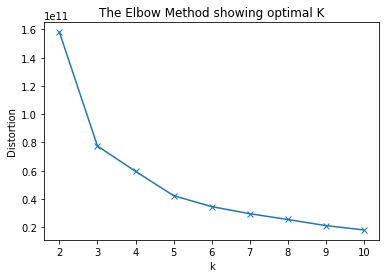

In [599]:
# Here, we chose 5 to be a good cluster number with the elbow method.
plt.plot(allclusters, sum_of_squared_distances, marker = "x")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing optimal K")
plt.show()

In [600]:
# Here we see that it makes a clustering according to the passenger count and other columns.
df[df["Clusters"] == 0].head(10)

,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,Orders.customer_type,Order_Items.product_id,Order_Items.qty,Order_Items.price,Products.id,Products.status,Products.vendor,Products.import_id,Products.shopping_brand,Products.shopping_flags,Products.google_shopping_type,Products.google_shopping_cat,Products.unit,Products.saved_status,Products.volume,Clusters
1,0.0,20.00,0.0,9.99,29.99,fedex,11|Ground,3.0,authorize.net,29.99,1,0.0,177.0,4,5.00,177.0,1.0,1.0,3.0,MEDLINE,62.0,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,EA,0.0,84.000000,0
2,0.0,68.78,0.0,9.95,78.73,manual,0|Standard Shipping,3.0,authorize.net,78.73,3,0.0,1.0,1,68.78,1.0,0.0,1.0,3.0,MEDLINE,62.0,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,CS,0.0,1360.171008,0
3,0.0,19.56,0.0,9.95,29.55,fedex,11|Ground,3.0,authorize.net,29.55,1,0.0,983.0,1,19.56,983.0,0.0,1.0,3.0,MEDLINE,62.0,"Walking Aids > Rollators, & Walkers > Walkers ...",Health & Beauty > Health Care,EA,0.0,1529.580000,0
4,0.0,36.05,0.0,9.95,46.00,fedex,11|Ground,3.0,authorize.net,46.00,1,0.0,991.0,1,36.05,991.0,1.0,1.0,3.0,ROSCOE MEDICAL INC,62.0,Physical Therapy > Electronic Muscle Stimulation,Health & Beauty > Health Care,EA,0.0,280.500000,0
5,0.0,44.46,0.0,9.95,54.41,fedex,11|Ground,0.0,authorize.net,79.99,1,0.0,310.0,1,44.46,1867.0,0.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care,EA,0.0,1339.975000,0
6,0.0,14.63,0.0,9.95,24.58,fedex,11|Ground,3.0,Credit Card,24.58,1,0.0,799.0,1,14.63,1867.0,0.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care,EA,0.0,1339.975000,0
7,0.0,39.19,0.0,9.95,49.14,fedex,11|Ground,3.0,authorize.net,49.14,1,0.0,1379.0,1,39.19,1379.0,0.0,1.0,3.0,MEDLINE,62.0,"Incontinence, Urology & Ostomy > incontinence ...",Health & Beauty > Health Care,CS,0.0,1413.856000,0
8,0.0,59.75,0.0,9.95,69.70,manual,0|Standard Shipping,3.0,Credit Card,69.70,1,0.0,815.0,1,59.75,815.0,0.0,1.0,3.0,MEDLINE,62.0,Bathroom & Safety > Bathroom > Toilet Risers &...,Health & Beauty > Health Care,EA,0.0,2800.000000,0
9,0.0,34.00,0.0,9.95,34.00,manual,0|Standard Shipping,3.0,Credit Card,34.00,1,0.0,1867.0,1,34.00,1867.0,0.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care,EA,0.0,1339.975000,0
10,0.0,34.00,0.0,9.95,34.00,manual,0|Standard Shipping,3.0,Credit Card,34.00,1,0.0,1867.0,1,34.00,1867.0,0.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care,EA,0.0,1339.975000,0


In [601]:
df[df["Clusters"] == 1].head(10)

,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,Orders.customer_type,Order_Items.product_id,Order_Items.qty,Order_Items.price,Products.id,Products.status,Products.vendor,Products.import_id,Products.shopping_brand,Products.shopping_flags,Products.google_shopping_type,Products.google_shopping_cat,Products.unit,Products.saved_status,Products.volume,Clusters
537,0.0,48.98,0.00,9.95,58.93,fedex,11|Ground,3.0,paypal,58.93,1,0.0,18548.0,1,12.36,18548.0,0.0,1.0,3.0,MEDLINE,62.0,"Incontinence, Urology & Ostomy > incontinence ...",Health & Beauty > Health Care,BG,0.0,1.000000e-09,1
628,0.0,241.56,0.00,0.00,241.56,fedex,11|Ground,3.0,authorize.net,241.56,1,0.0,18511.0,1,42.48,18511.0,0.0,1.0,3.0,MEDLINE,62.0,"Incontinence, Urology & Ostomy > incontinence ...",Health & Beauty > Health Care,CS,0.0,1.759725e+03,1
631,0.0,189.45,0.00,0.00,189.45,fedex,11|Ground,3.0,authorize.net,189.45,1,0.0,18511.0,1,42.48,18511.0,0.0,1.0,3.0,MEDLINE,62.0,"Incontinence, Urology & Ostomy > incontinence ...",Health & Beauty > Health Care,CS,0.0,1.759725e+03,1
901,0.0,17.99,1.46,0.00,19.45,fedex,11|Ground,3.0,authorize.net,19.45,3,0.0,21639.0,1,17.99,21639.0,3.0,1.0,3.0,MEDLINE,3.0,Top Sellers,Health & Beauty > Health Care,BG,3.0,1.339975e+03,1
908,0.0,10.45,0.00,0.00,10.45,manual,0|Standard Shipping,3.0,authorize.net,10.45,1,0.0,24416.0,1,10.45,24416.0,1.0,1.0,3.0,MEDLINE,0.0,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care,EA,0.0,1.339975e+03,1
909,0.0,26.12,2.12,0.00,19.99,manual,0|Standard Shipping,3.0,authorize.net,19.99,1,0.0,24418.0,1,13.13,24418.0,1.0,1.0,3.0,MEDLINE,0.0,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care,EA,0.0,1.339975e+03,1
910,0.0,26.12,2.12,0.00,19.99,manual,0|Standard Shipping,3.0,authorize.net,19.99,1,0.0,24416.0,1,12.99,24416.0,1.0,1.0,3.0,MEDLINE,0.0,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care,EA,0.0,1.339975e+03,1
1008,0.0,110.30,0.00,9.95,120.25,fedex,11|Ground,3.0,authorize.net,120.25,1,0.0,18509.0,2,55.15,18509.0,0.0,1.0,3.0,MEDLINE,62.0,"Incontinence, Urology & Ostomy > incontinence ...",Health & Beauty > Health Care,CS,0.0,2.808000e+03,1
1234,0.0,109.16,0.00,9.95,108.19,fedex,11|Ground,3.0,paypal,108.19,1,0.0,18513.0,2,54.58,18513.0,0.0,1.0,3.0,MEDLINE,62.0,"Incontinence, Urology & Ostomy > incontinence ...",Health & Beauty > Health Care,CS,0.0,3.327750e+03,1
2017,0.0,144.99,0.00,0.00,144.99,fedex,11|Ground,3.0,authorize.net,144.99,1,0.0,21950.0,1,53.99,21950.0,3.0,1.0,3.0,MEDLINE,62.0,Bathroom & Safety > Bathroom > Commodes Parts ...,Health & Beauty > Health Care,CS,3.0,1.104840e+03,1


In [602]:
df[df["Clusters"] == 2].head(10)

,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,Orders.customer_type,Order_Items.product_id,Order_Items.qty,Order_Items.price,Products.id,Products.status,Products.vendor,Products.import_id,Products.shopping_brand,Products.shopping_flags,Products.google_shopping_type,Products.google_shopping_cat,Products.unit,Products.saved_status,Products.volume,Clusters
39,0.0,33.21,0.00,9.95,43.20,fedex,11|Ground,3.0,authorize.net,43.20,1,0.0,1022.0,1,33.21,1022.0,0.0,1.0,3.0,MEDLINE,62.0,Bathroom & Safety > Bathroom > Commodes,Health & Beauty > Health Care,EA,0.0,17914.000000,2
136,0.0,211.84,0.00,0.00,211.84,NDSN,NATIONAL DELIVERY SYSTEMS,3.0,authorize.net,211.84,1,0.0,531.0,2,105.92,531.0,0.0,1.0,3.0,MEDLINE,62.0,Patient Room And Bedding > Body Positioning > ...,Health & Beauty > Health Care,EA,0.0,20160.000000,2
147,0.0,116.99,0.00,17.70,134.69,fedex,11|Ground,3.0,authorize.net,134.69,1,0.0,858.0,1,116.99,858.0,3.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Extra-Wide ...,Health & Beauty > Health Care > Mobility & Acc...,EA,3.0,30340.000000,2
149,0.0,113.39,0.00,2.91,116.30,fedex,11|Ground,3.0,authorize.net,116.30,1,0.0,837.0,1,113.39,837.0,3.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Standard Wh...,Health & Beauty > Health Care > Mobility & Acc...,EA,3.0,17111.250000,2
157,0.0,116.99,8.19,0.00,143.37,fedex,11|Ground,3.0,authorize.net,143.37,1,0.0,858.0,1,116.99,858.0,3.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Extra-Wide ...,Health & Beauty > Health Care > Mobility & Acc...,EA,3.0,30340.000000,2
158,0.0,116.99,0.00,17.00,133.99,fedex,11|Ground,3.0,authorize.net,133.99,1,0.0,858.0,1,116.99,858.0,3.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Extra-Wide ...,Health & Beauty > Health Care > Mobility & Acc...,EA,3.0,30340.000000,2
169,0.0,290.99,0.00,9.95,300.94,fedex,11|Ground,3.0,authorize.net,300.94,1,0.0,916.0,1,290.99,916.0,3.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Reclining ...,Health & Beauty > Health Care,EA,3.0,17679.460104,2
174,0.0,113.39,0.00,9.95,116.30,fedex,11|Ground,3.0,authorize.net,116.30,1,0.0,837.0,1,113.39,837.0,3.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Standard Wh...,Health & Beauty > Health Care > Mobility & Acc...,EA,3.0,17111.250000,2
176,0.0,116.99,0.00,9.95,133.99,fedex,11|Ground,3.0,authorize.net,133.99,1,0.0,858.0,1,116.99,858.0,3.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Extra-Wide ...,Health & Beauty > Health Care > Mobility & Acc...,EA,3.0,30340.000000,2
179,0.0,116.99,0.00,9.95,132.99,fedex,11|Ground,3.0,Credit Card,132.99,1,0.0,858.0,1,116.99,858.0,3.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Extra-Wide ...,Health & Beauty > Health Care > Mobility & Acc...,EA,3.0,30340.000000,2


In [603]:
df[df["Clusters"] == 3].head(10)

,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,Orders.customer_type,Order_Items.product_id,Order_Items.qty,Order_Items.price,Products.id,Products.status,Products.vendor,Products.import_id,Products.shopping_brand,Products.shopping_flags,Products.google_shopping_type,Products.google_shopping_cat,Products.unit,Products.saved_status,Products.volume,Clusters
517,0.0,48.48,0.00,9.95,58.43,manual,0|Standard Shipping,3.0,paypal,58.43,3,0.0,13475.0,1,24.99,13475.0,3.0,1.0,3.0,MEDLINE,30.0,Personal Care > Skin Care > Cleansers,Health & Beauty > Health Care,BG,3.0,1339.975,3
538,0.0,104.64,0.00,9.95,109.59,fedex,11|Ground,3.0,paypal,109.59,1,0.0,12964.0,2,52.32,12964.0,0.0,1.0,4.0,MEDLINE,62.0,"Incontinence, Urology & Ostomy > incontinence ...",Health & Beauty > Health Care,CS,0.0,4480.000,3
747,0.0,126.74,0.00,0.00,126.74,manual,-1|Free Shipping,3.0,authorize.net,126.74,1,0.0,14121.0,2,63.37,14121.0,3.0,7.0,6.0,ITA-MED,62.0,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care,EA,3.0,192.000,3
885,0.0,128.56,0.00,0.00,115.70,manual,-1|Free Shipping,3.0,authorize.net,115.70,1,0.0,13460.0,2,64.28,13460.0,1.0,1.0,4.0,MEDLINE,62.0,Pharmacy > Wound Care > Bandages > Liquid Band...,Health & Beauty > Health Care,BX,0.0,12.240,3
899,0.0,13.40,1.09,0.00,14.49,fedex,11|Ground,3.0,authorize.net,14.49,3,0.0,13234.0,1,13.40,13234.0,1.0,4.0,20.0,Purell &reg;,63.0,Personal Care > Skin Care > Hand Sanitizers,Health & Beauty > Health Care,EA,3.0,1339.975,3
1413,0.0,18.10,0.00,9.95,28.05,fedex,11|Ground,3.0,authorize.net,28.05,1,0.0,11788.0,1,18.10,11788.0,0.0,1.0,4.0,MEDLINE,62.0,Physical Therapy > Splints > Wrist & Forearm,Health & Beauty > Health Care,EA,0.0,133.056,3
1536,1.0,80.93,0.00,9.95,85.88,fedex,11|Ground,3.0,authorize.net,85.88,1,1.0,10577.0,1,12.52,10577.0,3.0,1.0,4.0,MEDLINE,62.0,"Incontinence, Urology & Ostomy > incontinence ...",Health & Beauty > Health Care,BG,3.0,294.000,3
1565,0.0,841.34,0.00,9.95,767.16,manual,0|Standard Shipping,3.0,authorize.net,851.29,14,0.0,10278.0,1,185.84,10278.0,0.0,1.0,4.0,MEDLINE,62.0,Patient Room And Bedding > Body Positioning > ...,Health & Beauty > Health Care,CS,0.0,1968.000,3
1578,0.0,277.63,0.00,0.00,277.63,manual,-1|Free Shipping,3.0,authorize.net,277.63,1,0.0,13219.0,1,257.50,13219.0,0.0,2.0,1.0,Drive Medical,62.0,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,EA,0.0,13909.250,3
1588,0.0,99.05,0.00,0.00,99.05,manual,-1|Free Shipping,3.0,authorize.net,99.05,1,0.0,13226.0,1,53.30,13226.0,0.0,2.0,1.0,Drive Medical,62.0,Bathroom & Safety > Bathroom > Commodes,Health & Beauty > Health Care,EA,0.0,2041.875,3


In [604]:
df[df["Clusters"] == 4].head(10)

,Customers.customer_type,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.payment_status,Orders.payment_type,Orders.payment_amount,Orders.status,Orders.customer_type,Order_Items.product_id,Order_Items.qty,Order_Items.price,Products.id,Products.status,Products.vendor,Products.import_id,Products.shopping_brand,Products.shopping_flags,Products.google_shopping_type,Products.google_shopping_cat,Products.unit,Products.saved_status,Products.volume,Clusters
0,0.0,57.20,0.00,9.95,64.29,fedex,11|Ground,3.0,authorize.net,64.29,1,0.0,2310.0,1,57.20,2310.0,0.0,1.0,3.0,MEDLINE,62.0,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,EA,0.0,5654.400,4
17,0.0,119.70,0.00,9.95,119.70,fedex,11|Ground,3.0,authorize.net,119.70,1,0.0,910.0,1,119.70,910.0,3.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care > Mobility & Acc...,CS,3.0,9394.000,4
72,0.0,119.70,10.63,9.95,140.28,fedex,11|Ground,3.0,authorize.net,140.28,1,0.0,910.0,1,119.70,910.0,3.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care > Mobility & Acc...,CS,3.0,9394.000,4
77,0.0,68.89,0.00,0.00,68.89,ups,-1|Free Shipping,3.0,authorize.net,68.89,1,0.0,3233.0,1,68.89,3233.0,0.0,2.0,1.0,Drive Medical,62.0,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,EA,0.0,7197.120,4
79,0.0,52.15,0.00,9.95,59.49,fedex,11|Ground,3.0,authorize.net,59.49,1,0.0,1015.0,1,52.15,1015.0,0.0,1.0,3.0,MEDLINE,62.0,Bathroom & Safety > Bathroom > Transfer Benches,Health & Beauty > Health Care,EA,0.0,10488.456,4
80,0.0,268.75,0.00,9.95,265.26,fedex,11|Ground,3.0,authorize.net,265.26,1,0.0,940.0,1,268.75,940.0,2.0,1.0,3.0,MEDLINE,62.0,"Walking Aids > Rollators, & Walkers > Knee Wal...",Health & Beauty > Health Care,EA,0.0,12956.125,4
86,0.0,119.70,9.76,9.95,129.65,fedex,11|Ground,3.0,authorize.net,129.65,1,0.0,911.0,1,119.70,911.0,3.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care > Mobility & Acc...,CS,3.0,11704.000,4
96,0.0,119.70,0.00,9.95,119.70,fedex,11|Ground,3.0,authorize.net,119.70,1,0.0,911.0,1,119.70,911.0,3.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care > Mobility & Acc...,CS,3.0,11704.000,4
97,0.0,76.70,5.37,9.95,92.02,fedex,11|Ground,0.0,authorize.net,79.99,1,0.0,997.0,1,76.70,997.0,0.0,1.0,3.0,MEDLINE,62.0,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,CS,0.0,9474.850,4
126,0.0,112.99,0.00,17.00,129.99,fedex,11|Ground,3.0,Credit Card,129.99,1,0.0,911.0,1,112.99,911.0,3.0,1.0,3.0,MEDLINE,62.0,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care > Mobility & Acc...,CS,3.0,11704.000,4
